In [81]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

Reference:  
http://www.morikita.co.jp/books/book/3022  
http://www.isc.meiji.ac.jp/~mizutani/python/sovling_kdv.html  

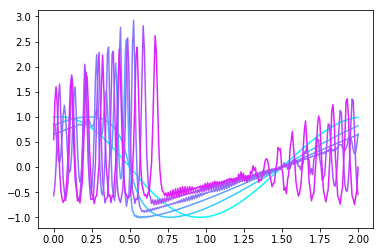

In [137]:
x = np.linspace(0, 2, num=256)
dx = 0.4
dt = 0.1 #min(dx/2/10, dx*dx*dx/10)
ep = 0.2
mu = 0.1

#u = -two_soliton(x, -0.4)
u = np.cos(np.pi*x)
up = np.pad(u, (2, 2), 'wrap')
u -= ep * dt/(6*dx) * (up[3:-1]+up[2:-2]+up[1:-3]) * (up[3:-1]-up[1:-3])
u -= mu * dt/(2*dx*dx*dx) * (up[4:]-2*up[3:-1]+2*up[1:-3]-up[:-4])

n_loop = 3000
cmap = plt.get_cmap("cool")
for i in range(n_loop):
    u, up = (up[2:-2], np.pad(u, (2, 2), 'wrap'))
    u -= ep * dt/(3*dx) * (up[3:-1]+up[2:-2]+up[1:-3]) * (up[3:-1]-up[1:-3])
    u -= mu * dt/(2*dx*dx*dx) * (up[4:]-2*up[3:-1]+2*up[1:-3]-up[:-4])
    if i%500==99:
        plt.plot(x, u, c=cmap(i/n_loop))

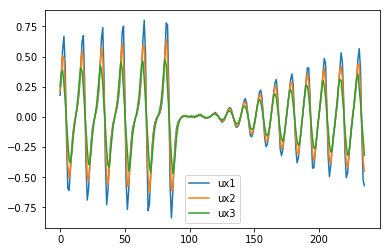

In [25]:
# differential of u[10]
plt.plot((u[11:-9]-u[9:-11])/2)
plt.plot((u[12:-8]-u[8:-12])/4)
plt.plot((u[13:-7]-u[7:-13])/6)

plt.legend(["ux{}".format(i) for i in [1,2,3]])

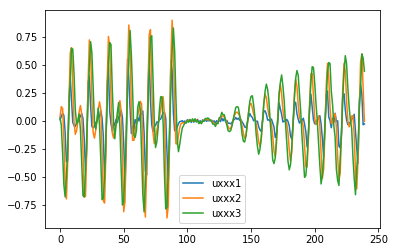

In [37]:
udxxx = []
udxxx.append( (up[12:-8]-2*up[11:-9]+2*up[9:-11]-up[8:-12])/2 )
udxxx.append( (up[14:-6]-2*up[12:-8]+2*up[8:-12]-up[6:-14])/4 )
udxxx.append( (up[16:-4]-2*up[13:-7]+2*up[7:-13]-up[4:-16])/6 )
plt.plot(udxxx[0])
plt.plot(udxxx[1])
plt.plot(udxxx[2])
plt.legend(["uxxx{}".format(i) for i in [1,2,3]])

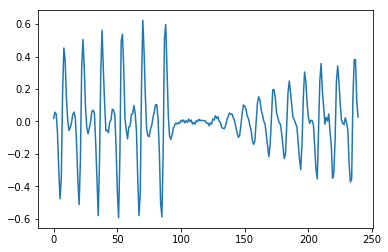

In [38]:
plt.plot(0.6*udxxx[0]+0.3*udxxx[1]+0.1*udxxx[2])

In [79]:
def diff(u, dx=1.):
    c = 1/dx * np.array((0.10/6, 0.25/4, 0.65/2, 0, -0.65/2, -0.25/4, -0.10/6))
    up = np.pad(u, (3, 3), 'wrap')
    return np.convolve(up, c, 'valid')

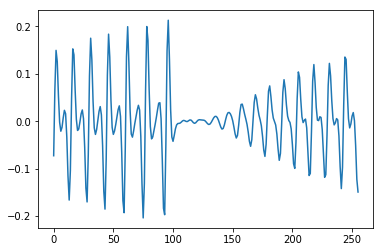

In [80]:
plt.plot(diff(diff(diff(u))))

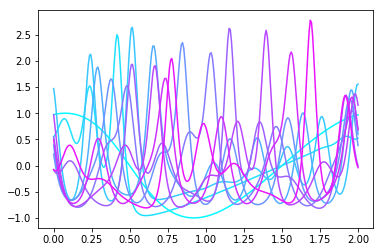

In [124]:
def avg(u, c=1/3*np.ones(3)):
    up = np.pad(u, (1, 1), 'wrap')
    #return np.convolve(up[2:]+up[1:-1]+up[:-2])
    return np.convolve(up, c[::-1], 'valid')

x = np.linspace(0, 2, num=256)
dx = 0.2
dt = 0.1 #min(dx/2/10, dx*dx*dx/10)
ep = 0.2
mu = 0.1

u = np.cos(np.pi*x)
u_ = u.copy()
ux = diff(u_, dx)
uxxx = diff(diff(ux, dx), dx)
u -= ep * dt * avg(u_) * ux
u -= mu * dt * uxxx

n_loop = 5000
cmap = plt.get_cmap("cool")
for i in range(n_loop):
    u, u_ = (u_.copy(), u.copy())
    ux = diff(u_, dx)
    uxxx = diff(diff(ux, dx), dx)
    u -= ep * 2*dt * avg(u_) * ux
    u -= mu * 2*dt * uxxx
    if i%500==99:
        plt.plot(x, u, c=cmap(i/n_loop))

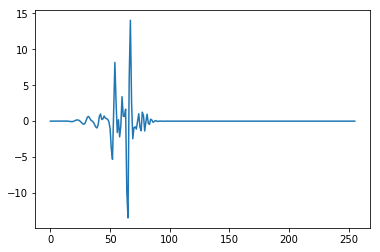

In [99]:
plt.plot(uxxx)

In [148]:
x = np.linspace(0, 2, num=256)
dx = 0.4
dt = 0.1 #min(dx/2/10, dx*dx*dx/10)
ep = 0.2
mu = 0.1

def clamp(u, K=100.):
    return np.maximum(np.minimum(u, K), -K)

def diff(u, dx=1.):
    c = 1/dx * np.array((0.10/6, 0.25/4, 0.65/2, 0, -0.65/2, -0.25/4, -0.10/6))
    up = np.pad(u, (3, 3), 'wrap')
    return clamp(np.convolve(up, c, 'valid'))

class KdV:
    def __init__(self, x):
        u = np.cos(np.pi*x)
        u_ = u.copy()
        ux = diff(u_, dx)
        uxxx = diff(diff(ux, dx), dx)
        u -= ep * dt * avg(u_) * ux
        u -= mu * dt * uxxx
        
        self.u = u
        self.u_ = u_
    
    def step(self):
        u, u_ = (self.u_.copy(), self.u.copy())
        ux = diff(u_, dx)
        uxxx = diff(diff(ux, dx), dx)
        u -= ep * 2*dt * avg(u_) * ux
        u -= mu * 2*dt * uxxx
        
        # Diffusion
        #u = avg(u, np.array((0.005, 0.99, 0.005)))
        
        self.u = u
        self.u_ = u_
        return u
    
    def loop(self, n=10):
        for i in range(n):
            self.step()
        return self.u

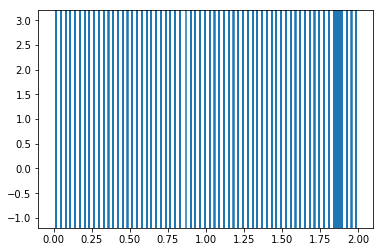

In [156]:
x = np.linspace(0, 2, num=512)
dx = 0.1
dt = 0.03
ep = 0.2
mu = 0.1

kdv = KdV(x)
fig, ax = plt.subplots()
im, = ax.plot(x, kdv.u)
ax.set_ylim([-1.2, 3.2])

update = lambda t: im.set_data(x, kdv.loop(300))
anim = FuncAnimation(fig, update, interval=100, frames=100)
HTML(anim.to_jshtml())

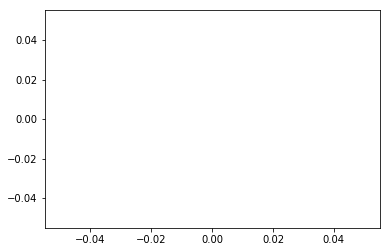

In [140]:
plt.plot(kdv.u)